## Introduction
This workshop will cover methods to explore, analyze, and do stuff with common data sources in
a bio lab. We’ll use temperature data from probes that were connected to an incubator over the
course of a week as an example.
Data analysis topics include:
- Data extraction
- Data shaping
- Data slicing and aggregation
- Calculating statistics and metrics
- Plotting your data

## Protocol
### Set up
If you're reading this, you probably already did the set up, but just in case:

1. [Download Anaconda](https://www.anaconda.com/distribution/#download-section) onto your laptop and install. Anaconda packages all the different
tools you’ll need into one download. In this workshop we’ll make use of Jupyter Lab as an
interface, Pandas for analyzing our data, and Matplotlib to plot our data.
2. Download the tutotial files and dataset
3. Start a local Jupyter sever by typing ```jupyter lab``` into the terminal (Mac/Linux) or command line (Windows)

### Analysis
In this case, we imagine we have been donated two incubators and we would like to know if they
work. We run them both for a week set to 30C and log the actual temperature inside the chamber.
After a week, we have a CSV (comma-seperated value) file with the data for both incubators. Let’s
look at the file to decide if we should keep these incubators. We'll use this Jupyter notebook as a template.
1. Set up our notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2. Load the data from the the CSV file

In [2]:
df = pd.read_csv('demo_data.csv',parse_dates=['datetime'])
df.head()

,datetime,variable,value
0,2019-10-09 08:00:00,A,1
1,2019-10-09 08:00:00,B,0
2,2019-10-09 09:00:00,A,2
3,2019-10-09 09:00:00,B,3
4,2019-10-09 10:00:00,A,1


3. Reshape the data so it’s easier to work with

In [3]:
df = df.pivot(index='datetime',columns='variable',values='value')
df.head()

variable,A,B
datetime,,
2019-10-09 08:00:00,1,0
2019-10-09 09:00:00,2,3
2019-10-09 10:00:00,1,0


4. Spot-check the data to make sure it looks like the measurements we took

In [4]:
#Use .loc to check a time in the middle of the experiment
df.loc['2019-10-09 09:00']

variable
A    2
B    3
Name: 2019-10-09 09:00:00, dtype: int64

In [5]:
#You can also make slices
df.loc['2019-10-09 08:00':'2019-10-09 09:00']

variable,A,B
datetime,,
2019-10-09 08:00:00,1,0
2019-10-09 09:00:00,2,3


In [6]:
#Check individual columns, which Pandas calls Series
df.A

datetime
2019-10-09 08:00:00    1
2019-10-09 09:00:00    2
2019-10-09 10:00:00    1
Name: A, dtype: int64

In [7]:
#You can write logical tests against Series and use them to select specific rows
df.loc[df.B > 2]

variable,A,B
datetime,,
2019-10-09 09:00:00,2,3


5. Plot the data to quickly get a sense of it’s quality

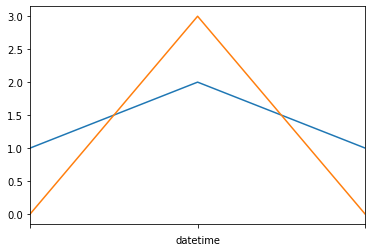

In [8]:
#Two simple plots
#We put ";" on the end to supress text that would print out otherwise
df.A.plot();
df.B.plot();

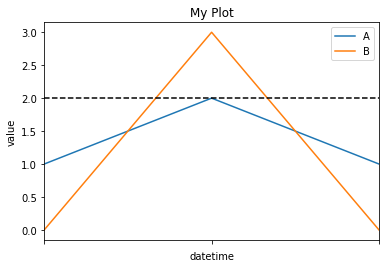

In [9]:
#A more complex plot
target=2
fig, ax = plt.subplots()
for series in df[['A','B']]:
    df[series].plot(ax=ax)
ax.axhline(target, color='black', linestyle='--')
ax.set_ylabel('value')
ax.legend()
ax.set_title('My Plot')
#ax.set_ylim([0,40])
plt.show()

6. Calculate statistics about the perfomance

In [10]:
#Basic stats are built-in functions
df.min()

variable
A    1
B    0
dtype: int64

In [11]:
df.max()

variable
A    2
B    3
dtype: int64

In [12]:
df.mean()

variable
A    1.333333
B    1.000000
dtype: float64

In [13]:
df.std()

variable
A    0.577350
B    1.732051
dtype: float64

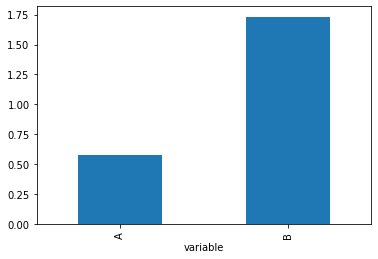

In [14]:
#Can also plot
df.std().plot(kind='bar');

7. Find the average performance of each incubator on each day

In [15]:
#Create a new column with this syntax
#We reset_index because Pandas will generally not perform operations on indices
#Note the index is only reset for this calculation
df = df.reset_index()
df['day'] = df.datetime.dt.date
df = df.set_index('datetime')

#Groupby divides the dataframe into groups, performs an operation on each, then reassembles the outputs
df.groupby('day').mean()

variable,A,B
day,,
2019-10-09,1.333333,1.0


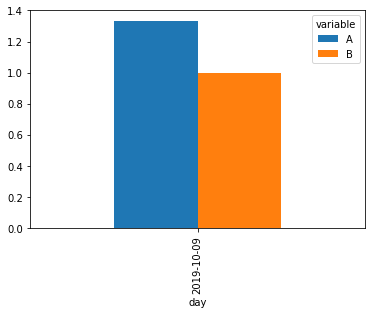

In [24]:
df.groupby('day').mean().plot(kind='bar');

8. Export the analysis for easy reading by your friends!

In [17]:
#Just the newly-shaped data
df.to_csv('rebuilt_data.csv')
#or if you just want it on the clipboard
df.to_clipboard(excel=True,sep='\t')

Or export the entire notebook with _File>Export Notebook As...>_ and picking an export type

## Conclusion:
Should we keep either of these incubators?

<hr>  

## Bonus: An Easier Way to Make Pretty Plots
Matplotlib comes built-in with Anaconda, and is an extremely powerful plotting tool. However, the code quickly becomes complicated for even small increases in plot complexity.  

**Altair is a good package for most plots**.
It's a new-ish package that uses a _declaritive model_. Matplotlib expects a series of instructions to build our plot, while Altair just asks us to describe the plot we want and makes it for us.

To use, we must first install the package from the Anaconda command line: ```conda install altair```. Then we'll import into our notebook:

In [18]:
import altair as alt

Altair wants our data in a very specific format. The data must be "long and skinny", or what is referred to in some data science circles as "tidy". "Tidyness" is a general approach to data analysis that is a much bigger deal in the _R_ universe, but it's worth [reading more](tidyverse Link) on if you intend to do a lot of data analysis. For our purposes, we don't need more than knowing this format is necessary for Altair.  

Our data was actually already tidy when we imported it! We could re-import it, but we could also take opportunity to learn to to reverse a pivot.

In [19]:
#Melting a dataframe is kind of like the opposite of a pivot
tidy_df = df.reset_index().melt(id_vars='datetime', value_vars = ['A','B'])
tidy_df.head()

,datetime,variable,value
0,2019-10-09 08:00:00,A,1
1,2019-10-09 09:00:00,A,2
2,2019-10-09 10:00:00,A,1
3,2019-10-09 08:00:00,B,0
4,2019-10-09 09:00:00,B,3


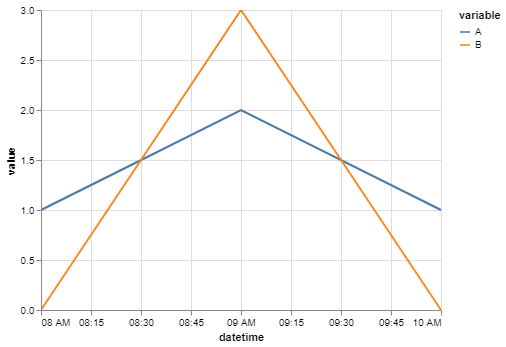

In [20]:
#We now just have to tell Altair which column to use as values and how to split the values into different colors
alt.Chart(tidy_df).mark_line().encode(
    x='datetime',
    y='value',
    color='variable',
).interactive()

### Let's make it a website!

Altair has this neat method ```.serve()``` - add it to the end of your chart object and it automatically starts a web server showing your chart. It hangs your notebook if you run it from Jupyter, so here we wrap it in a try/except statement so that it will only run if it's _not_ in a Jupyter environment. Pretty cool!

In [21]:
try:
    jupyter_test = get_ipython
    pass
    
except:
    fig = alt.Chart(tidy_df, width=600, height = 500).mark_line().encode(
        x='datetime',
        y='value',
        color='variable',
    ).interactive()

    fig.serve()